# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import (
    make_blobs,
    fetch_openml
)
from k_means import KMeans
from sklearn.cluster import KMeans as KM

# Data

In [30]:
x, y = make_blobs(n_samples=300, n_features=2, centers=10,
                  cluster_std=0.7, center_box=(-10.,10.))

In [31]:
# visualize training data
def plot_data(x):
    plt.figure(figsize=(5,5))
    plt.scatter(x[:,0],x[:,1],s=30,c='black',alpha=0.5)
    plt.show()

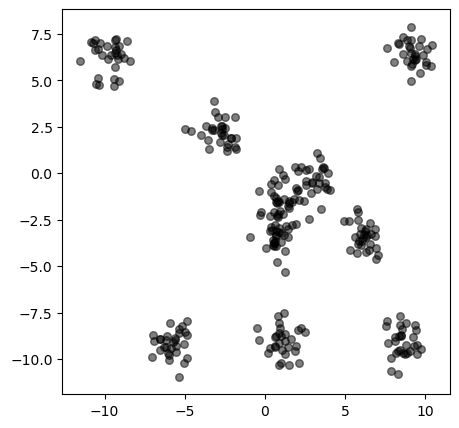

In [32]:
plot_data(x)

In [64]:
mnist = fetch_openml(data_id=41082)['data'].values

# Testing Own Model

**visualizations are not supported for higher dimension data**

## Basic k-means

### Visualize moving centroids

In [33]:
my_model=KMeans(n_clusters=8,n_init=1)

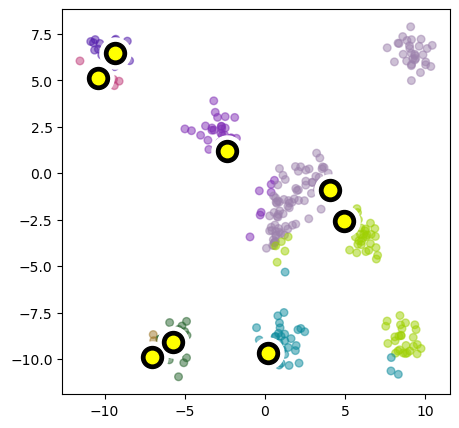

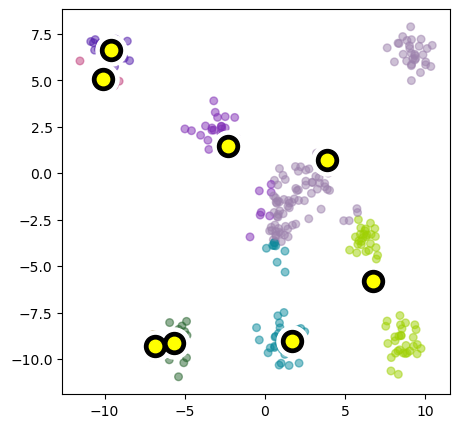

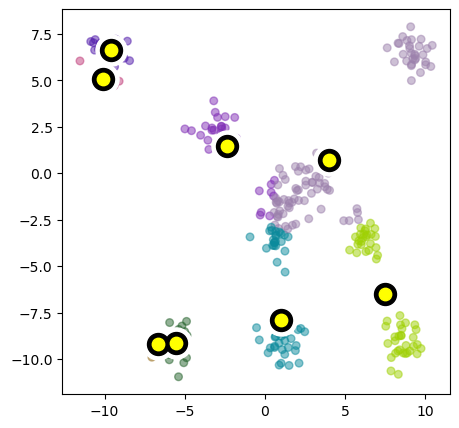

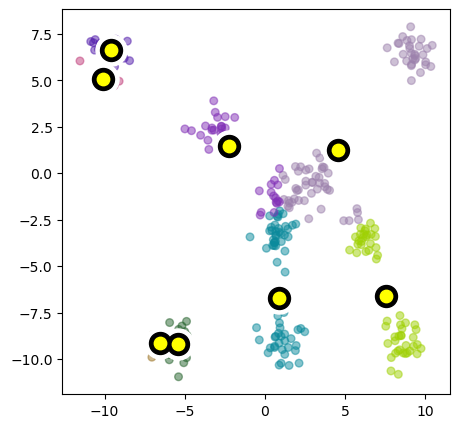

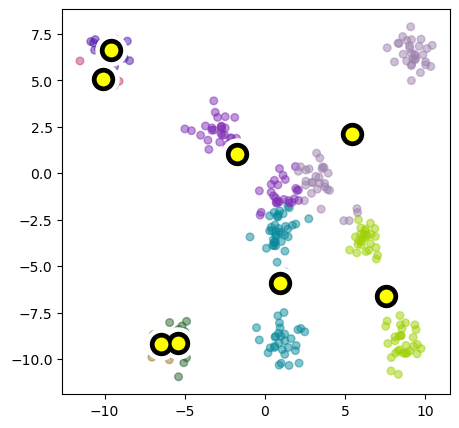

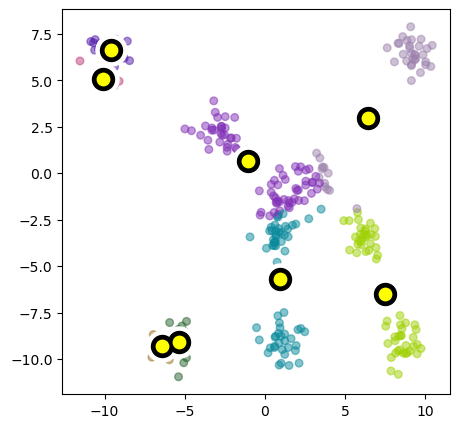

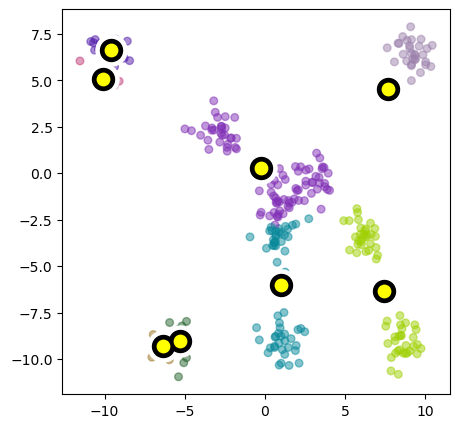

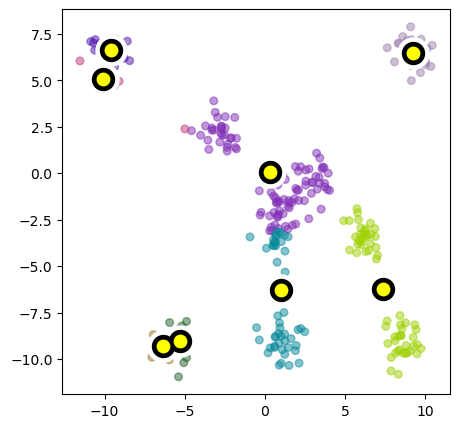

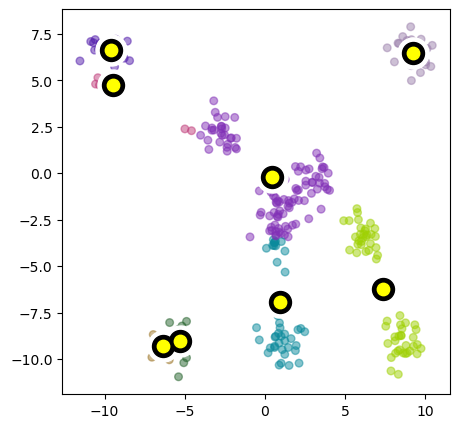

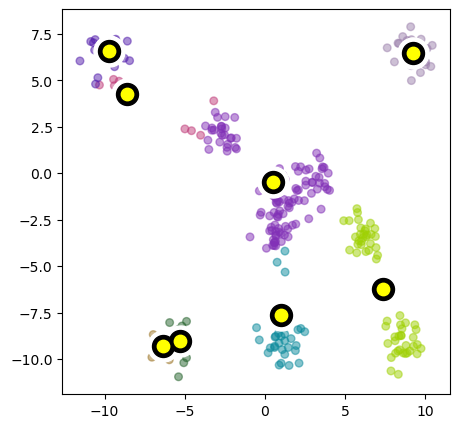

In [34]:
my_model.fit(x)

### Visualize the final training result

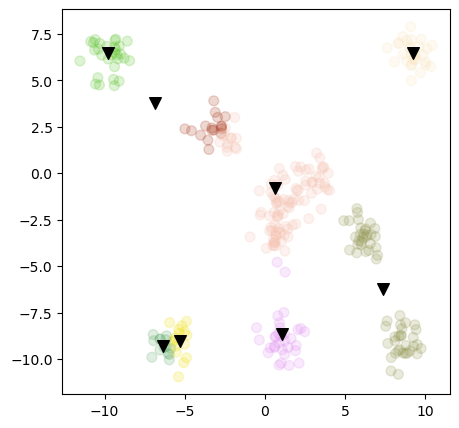

In [35]:
predictions = my_model.predict(x)
colors=np.random.rand(my_model.n_clusters,3)
plt.figure(figsize=(5,5))
color=[colors[p] for p in predictions]
plt.scatter(x[:,0],x[:,1],s=50,c=color,alpha=0.2)
plt.scatter(my_model.f_centroids[:,0],my_model.f_centroids[:,1],s=70,c='black',marker='v')
plt.show()

### Visualize error history

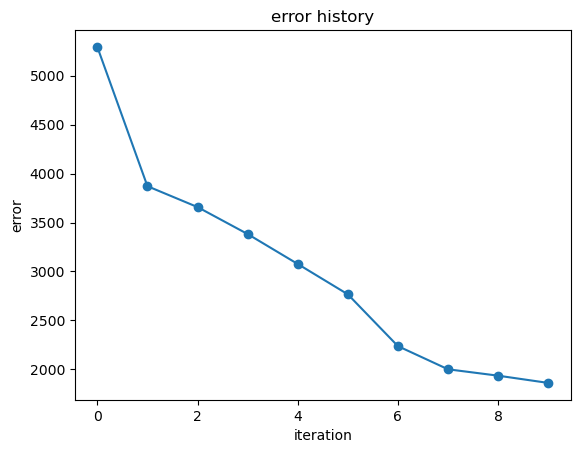

In [36]:
plt.plot(my_model.f_error,'o-')
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('error history')
plt.show()

## k-means++

### Visualize moving centroids

In [37]:
my_model2=KMeans(n_clusters=8,n_init=1,init='k-means++')

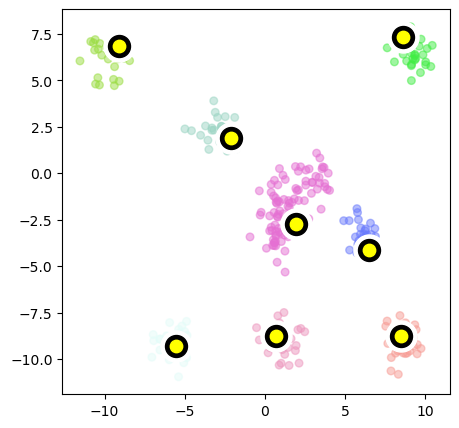

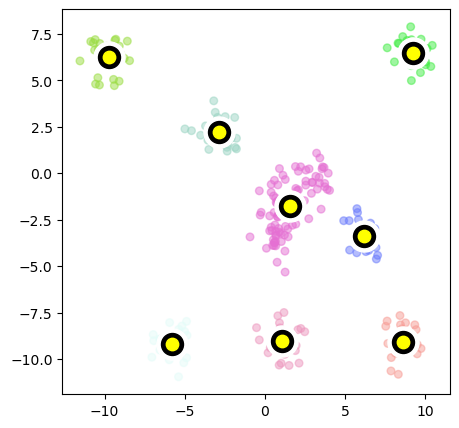

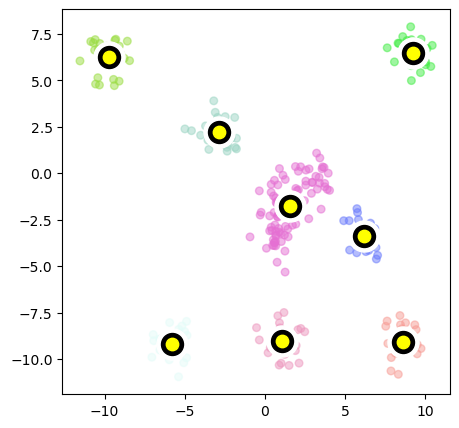

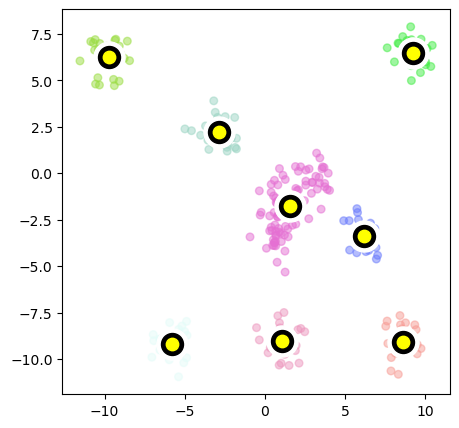

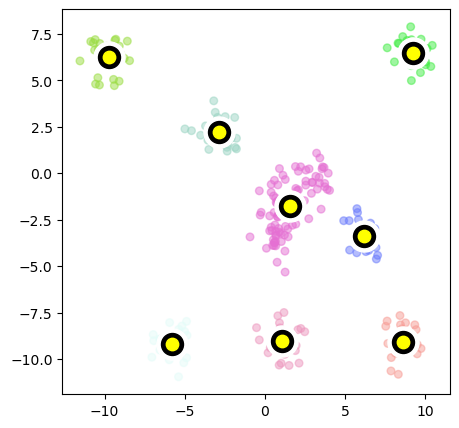

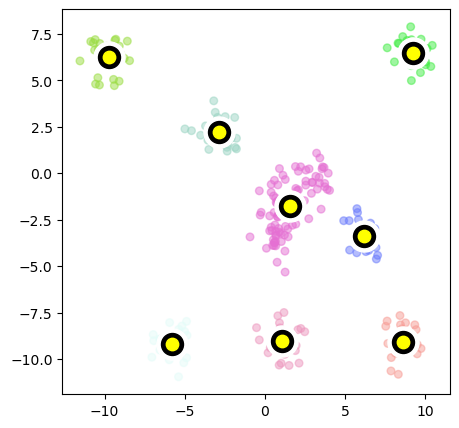

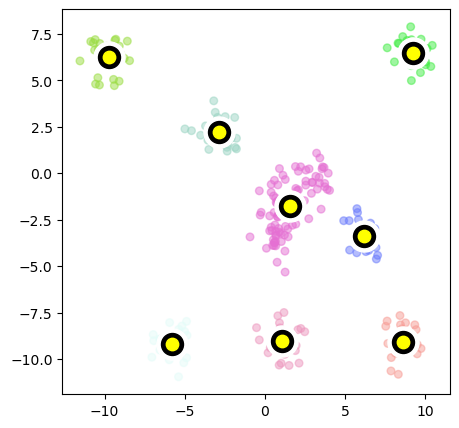

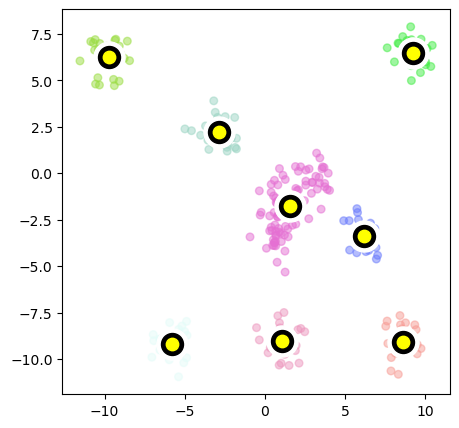

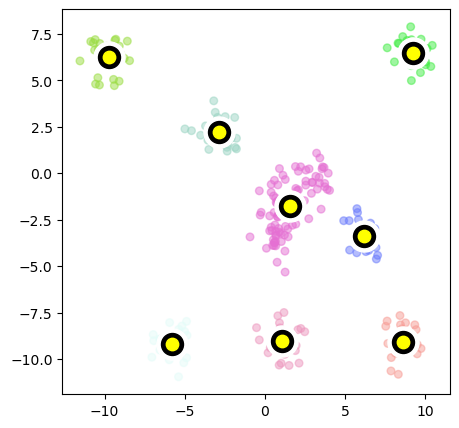

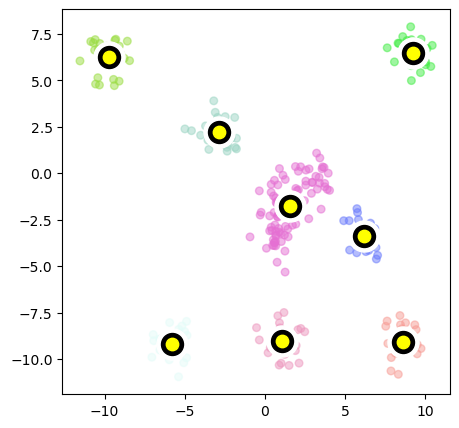

In [38]:
my_model2.fit(x)

## Visualize the final training result

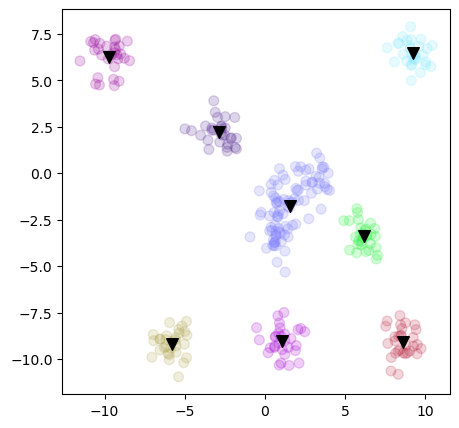

In [39]:
predictions2 = my_model2.predict(x)
colors2=np.random.rand(my_model2.n_clusters,3)
plt.figure(figsize=(5,5))
color2=[colors2[p] for p in predictions2]
plt.scatter(x[:,0],x[:,1],s=50,c=color2,alpha=0.2)
plt.scatter(my_model2.f_centroids[:,0],my_model2.f_centroids[:,1],s=70,c='black',marker='v')
plt.show()

### Visualize error history

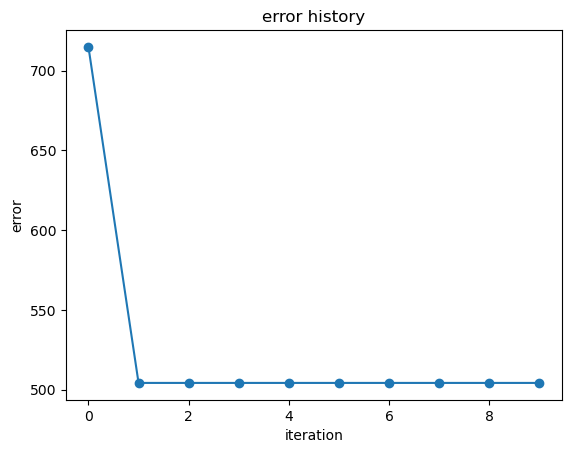

In [40]:
plt.plot(my_model2.f_error,'o-')
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('error history')
plt.show()

# Testing basic k-means using sklearn

In [53]:
sk_model = KM(n_clusters=8,init='random',max_iter=10,n_init=1)
sk_model.fit(x)

KMeans(init='random', max_iter=10, n_init=1)

In [54]:
sk_model.cluster_centers_

array([[ 1.09588987, -9.03225006],
       [-2.85850565,  2.19777427],
       [ 4.63613084, -1.86341755],
       [ 9.23003145,  6.44990829],
       [ 8.49488786, -8.80103422],
       [-9.7366842 ,  6.26151468],
       [ 0.89430789, -2.35758123],
       [-5.8073389 , -9.15840085]])

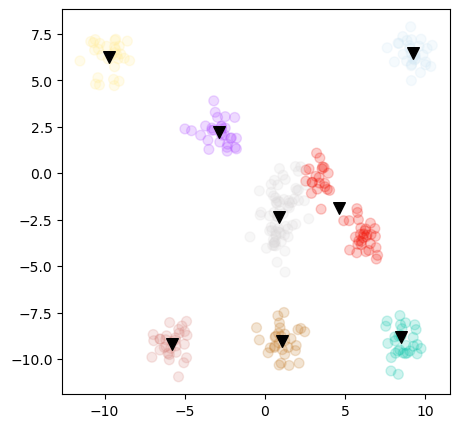

In [55]:
# Visualize the training result
colors=np.random.rand(sk_model.n_clusters,3)
plt.figure(figsize=(5,5))
color=[colors[p] for p in sk_model.labels_]
plt.scatter(x[:,0],x[:,1],s=50,c=color,alpha=0.2)
plt.scatter(sk_model.cluster_centers_[:,0],sk_model.cluster_centers_[:,1],s=70,c='black',marker='v')
plt.show()

In [56]:
# print the final error
# inertia_ : sum of squared distances of samples to their closest cluster center
print('error = {:.4f}'.format(sk_model.inertia_))

error = 589.1078


# Testing k-means++ using sklearn: MNIST clustering

In [101]:
# normalize b/w 0 and 1
mnist_n = mnist/225

In [102]:
# cluster the data points into 10 groups using k-means++
model=KM(n_clusters=10,
             init='k-means++',
             n_init=5,
             max_iter=60)

In [103]:
model.fit(mnist_n)

KMeans(max_iter=60, n_clusters=10, n_init=5)

In [104]:
clust=model.predict(mnist_n)

In [105]:
centroids=model.cluster_centers_

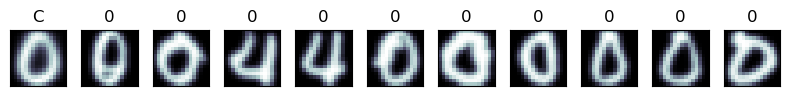

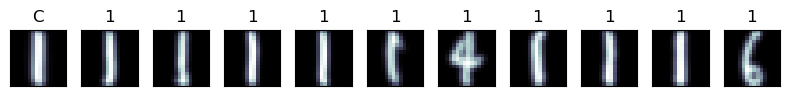

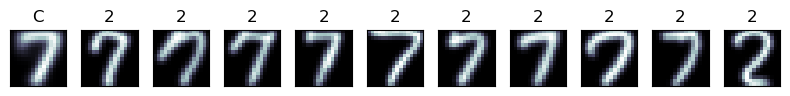

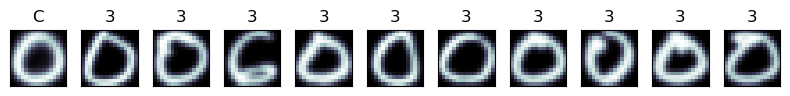

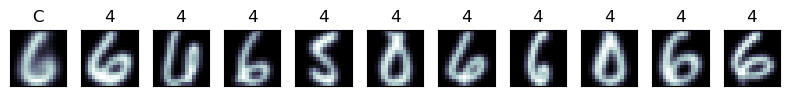

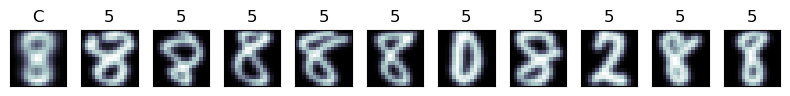

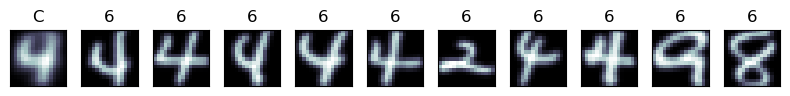

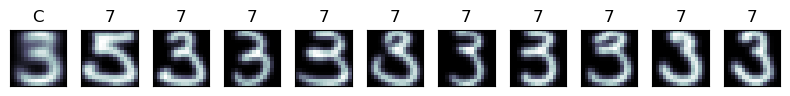

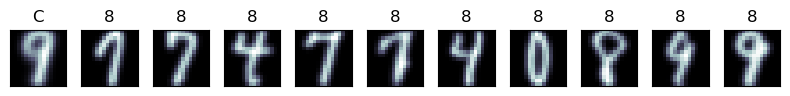

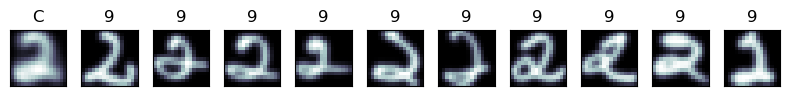

In [108]:
# Check out the images for each cluster.
for k in np.unique(clust):
    # Find 10 images belonging to cluster k, and centroid image.
    idx = np.where(clust == k)[0]
    images = mnist_n[idx[:10]]
    centroid = centroids[k, :]
    
    # Find 10 images closest to each centroid image.
    #d = np.sqrt(np.sum((mnist_n[idx] - centroid)**2, axis=1))
    #nearest = np.argsort(d)[:10]
    #images = mnist_n[idx[nearest]]
    
    
    # display the central image
    f = plt.figure(figsize=(8, 2))
    image = centroid.reshape(16, 16)
    ax = f.add_subplot(1, 11, 1)
    ax.imshow(image, cmap=plt.cm.bone)
    ax.grid(False)
    ax.set_title("C")
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.tight_layout()
    
    # display 10 images belonging to the centroid
    for i in range(10):
        image = images[i].reshape(16,16)
        ax = f.add_subplot(1, 11, i + 2)
        ax.imshow(image, cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(k)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()